# Support Vector Machines (SVM)

The support vector machine (SVM) is a classification method that attempts to find a hyperplane that separates classes of observations in **feature space**.

In contrast to some other classifications methods we have seen (*e.g.* Bayesian), the SVM does not invoke a probability model for classification; instead, we aim for the direct caclulation of a separating hyperplane.

Consider the logistic regression model, which transforms a linear combination of predictors with the logistic function.

$$g_{\theta}(x) = \frac{1}{1+\exp(-\theta^{\prime} x)}$$

Notice that when our response is $y=1$, we want the product $\theta^{\prime} x$ to be a very large, positive value so that $g_{\theta}(x) \rightarrow 1$, and when $y=0$, we want this product to be a very large, negative value, so that $g_{\theta}(x) \rightarrow 0$.

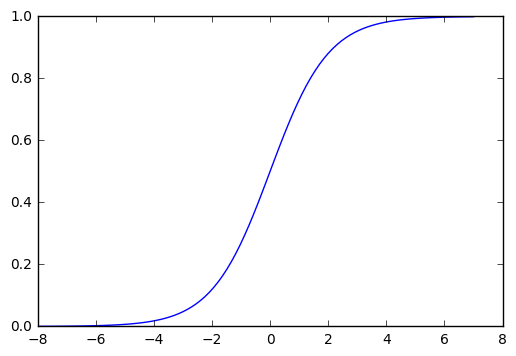

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt

def logistic(x, theta): 
    return 1. / (1. + np.exp(-x.dot(theta)))

theta = [2, -0.5]
x = np.c_[np.ones(100), np.linspace(-10,20,100)]

y = logistic(x, theta)

plt.plot(x.dot(theta), y)
plt.show()

The negative log-likelihood (or cost function) for the logistic regression model is as follows:

$$l(y_i|\theta,x) = -[y_i \log g_{\theta}(x) + (1-y_i)\log(1-g_{\theta}(x))]$$

Consider the case where $y_i=1$. This implies that the cost function is:

$$l(y_i=1|\theta,x) = - \log \left[ \frac{1}{1+\exp(-\theta\prime x)} \right]$$

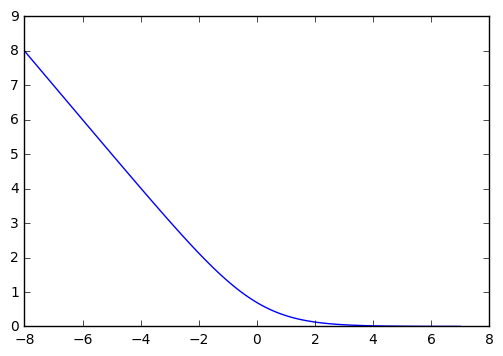

In [2]:
plt.plot(x.dot(theta), -np.log(y))
plt.show()

and when $y_i=0$:

$$l(y_i=0|\theta,x) = - \log \left[ 1 - \frac{1}{1+\exp(-\theta\prime x)} \right]$$

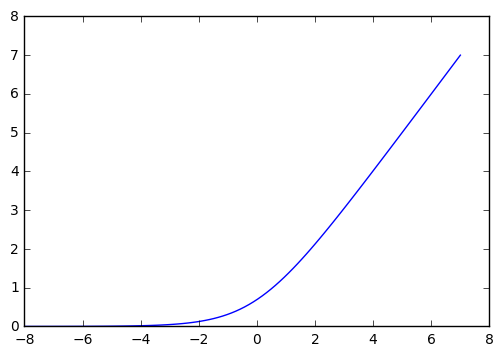

In [3]:
plt.plot(x.dot(theta), -np.log(1.-y))
plt.show()

One way to develop a support vector machine is to modify the logistic regression model by substituting a different cost function, which is just a piecwise linear function.

For $y_i=1$:

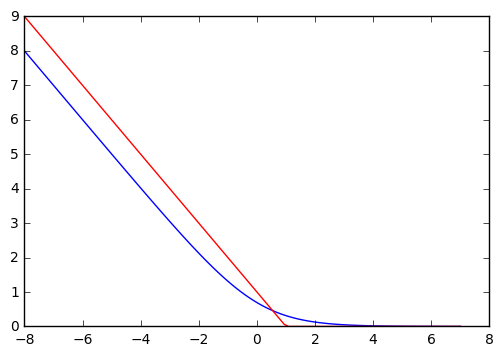

In [4]:
plt.plot(x.dot(theta), -np.log(y))

hinge_cost = lambda x, theta: np.maximum(0, 1 - x.dot(theta))

plt.plot(x.dot(theta), hinge_cost(x, theta), 'r-')
plt.show()

For $y_i=0$:

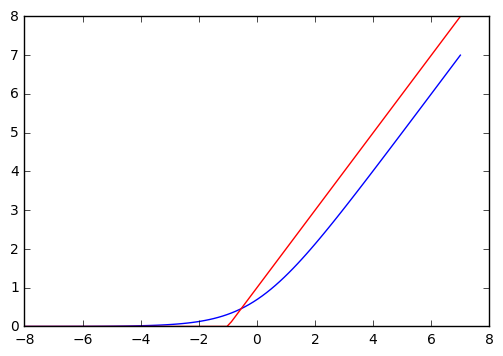

In [5]:
plt.plot(x.dot(theta), -np.log(1-y))

hinge_cost = lambda x, theta: np.maximum(0, 1 + x.dot(theta))

plt.plot(x.dot(theta), hinge_cost(x, theta), 'r-')
plt.show()

Now consider the estimation of the parameters of a regularized logistic regression model. This is typically by minimizing:

$$\min_{\theta} \frac{1}{n} \left[ \sum_{i=1}^n y_i -\log g_{\theta}(x_i) + (1-y_i)(-\log(1-g_{\theta}(x_i))) \right] + \frac{\lambda}{2n} \sum_{j=1}^k \theta^2_j$$

for the support vector machine, we instead substitute our cost function (which we will call $k$) in place of the logistic regression likelihood:

$$\min_{\theta} \left[ C \sum_{i=1}^n y_i k_1(\theta^{\prime} x_i) + (1-y_i) k_0(\theta^{\prime} x_i) \right] + \frac{1}{2}\sum_{j=1}^k \theta^2_j$$

where the parameter $C$ is plays a role equivalent to $1/\lambda$.

Notice that to make these cost functions $k$ small, we want $x \ge 1$ or $x \le -1$ rather than just being greater than or less than zero, for $y=1$ or $y=0$, respectively. If we set the parameter $C$ very large, we would want the summation term to be equal or close to zero in order to minimize the overall optimization objective.

This objective then essentially becomes:

$$\min_{\theta} \frac{1}{2} \sum_{j=1}^k \theta^2_j$$
$$\begin{aligned}
\text{subject to }\theta^{\prime} x_i \ge 1 &\text{ if } y_i=1 \\
\theta^{\prime} x_i \le -1 &\text{ if } y_i=0
\end{aligned}$$

Consider a dataset with two linearly separable groups.

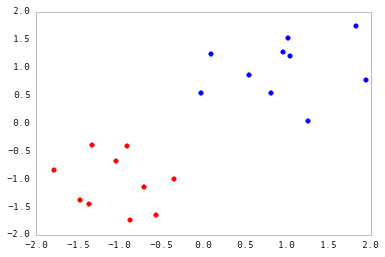

In [6]:
g1 = np.random.multivariate_normal((-1,-1), np.eye(2)*0.2, 10)
g2 = np.random.multivariate_normal((1,1), np.eye(2)*0.2, 10)

plt.scatter(*g1.T, color='r')
plt.scatter(*g2.T, color='b')

plt.xlim(-2,2); plt.ylim(-2,2);

One possible separation is a line that passes very close to points in both groups.

In [7]:
x,y = np.transpose([g1[np.where(g1.T[1]==g1.max(0)[1])[0][0]], 
                       g2[np.where(g2.T[1]==g2.min(0)[1])[0][0]]])

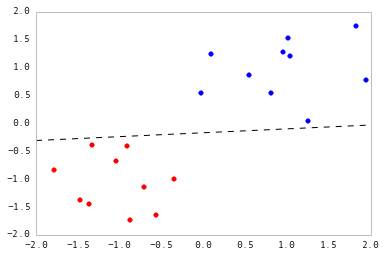

In [8]:
plt.scatter(*g1.T, color='r')
plt.scatter(*g2.T, color='b')

x,y = np.transpose([g1[np.where(g1.T[1]==g1.max(0)[1])[0][0]], 
                       g2[np.where(g2.T[1]==g2.min(0)[1])[0][0]]])
b0,b1 = np.linalg.lstsq(np.c_[[1,1],x], y)[0]
xspace = np.linspace(-3,3,100)
plt.plot(xspace, b0 + (b1-.1)*xspace, 'k--')
plt.xlim(-2,2); plt.ylim(-2,2);

This seems like a poor choice of decision boundary, even though it separates the groups, because it may not be a *robust* solution. SVM avoids this by establishing a ***margin*** between the decision boundary and the nearest points in each group. This margin is maximized under SVM, and is partly the result of using 1 and -1 as the thresholds for the cost function, rather than zero.

## Large-margin Classification

To understand how SVM incorporates a margin into its decision boundary, it helps to re-write our objective function in terms of the norm (length) of the parameter vector:

$$\min_{\theta} \frac{1}{2} \sum_{j=1}^k \theta^2_j = \min_{\theta} \frac{1}{2} ||\theta||^2$$

Recall that when we take the inner product of two vectors, we are essentially projecting the values of one vector onto the other, in order to add them. In the case of our inner product $\theta^{\prime} x_i$, we are projecting the ith component of $x$ onto the parameter vector $\theta$. We can therefore re-write this inner product in terms of multiplying vector lengths:

$$\theta^{\prime} x_i = p_i ||\theta||$$

where $p_i$ is the projection of $x_i$ onto $\theta$. The objective function now becomes:

$$\min_{\theta} \frac{1}{2} ||\theta||^2$$
$$\begin{aligned}
\text{subject to }p_i ||\theta|| \ge 1 &\text{ if } y_i=1 \\
p_i ||\theta|| \le -1 &\text{ if } y_i=0
\end{aligned}$$

clearly, in order to satisfy this criterion for a given parameter vector $\theta$, we want the $p_i$ to be *as large as possible*. However, when the decision boundary is close to points in the dataset, the corresponding $p_i$ values will be very small, since they are being projected onto the $\theta$ vector, which is perpendicular to the decision boundary.

Here is a simple graphical illustration of the difference between two boundary choices, in terms of $p_i$ values.

First, a boundary choice that passes closely to the points of each class:

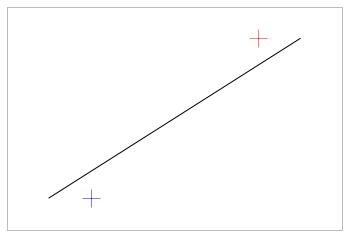

In [9]:
frame = plt.gca()
frame.axes.yaxis.set_ticklabels([])
frame.axes.xaxis.set_ticklabels([])

x1 = -1, 0
x2 = 1, 1

plt.scatter(*x1, s=300, marker='+')
plt.scatter(*x2, s=300, marker='+', color='r')
plt.plot([-1.5, 1.5],[0,1], 'k-');

The vector of parameters $\theta$ of the hyperplane is the **normal vector**, and it is *orthogonal* to the hyperplane surface that we are using as a decision boundary:

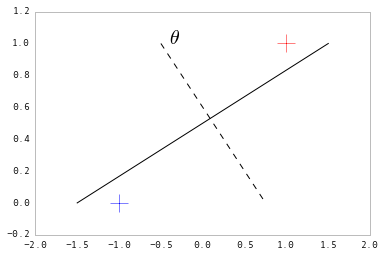

In [10]:
plt.scatter(*x1, s=300, marker='+')
plt.scatter(*x2, s=300, marker='+', color='r')
plt.plot([-1.5, 1.5],[0,1], 'k-')
plt.plot([-.5, .75], [1, 0], 'k--')
plt.annotate(r"$\theta$", xy=(-0.4, 1), fontsize=20);

In order to see what the $p_i$ values will be, we drop perpendicular lines down to the parameter vector $\theta$. Notice that for this decision boundary, the resulting $p_i$ are quite small (either positive or negative). In order to satisfy our constraint, this will force $||\theta||$ to be large, which is not desirable given our objective.

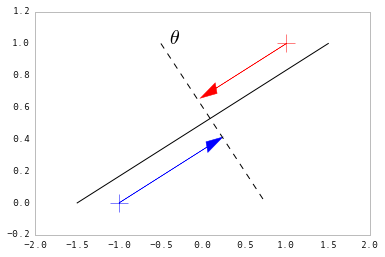

In [11]:
plt.scatter(*x1, s=300, marker='+')
plt.scatter(*x2, s=300, marker='+', color='r')
plt.plot([-1.5, 1.5],[0,1], 'k-')
plt.plot([-.5, .75], [1, 0], 'k--')
plt.annotate(r"$\theta$", xy=(-0.4, 1), fontsize=20)

plt.arrow(-1, 0, 3*(.35), .35, fc="b", ec="b", head_width=0.07, head_length=0.2)
plt.arrow(1, 1, -3*(.28), -.28, fc="r", ec="r", head_width=0.07, head_length=0.2);

Now consider another decision boundary, which intuitively appears to be a better choice.

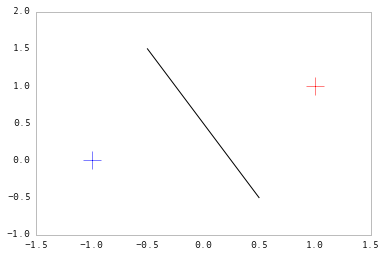

In [12]:
plt.scatter(*x1, s=300, marker='+')
plt.scatter(*x2, s=300, marker='+', color='r')
plt.plot([-.5,.5], [1.5,-.5], 'k-');

We can confirm this in terms of our objective function, by showing the corresponding projections $p_i$ to be large, which allows our parameter vector norm to be smaller.

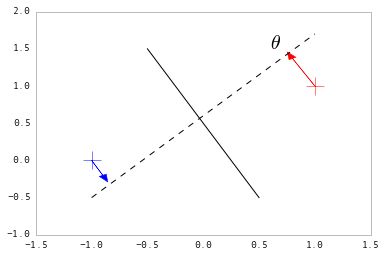

In [13]:
plt.scatter(*x1, s=300, marker='+')
plt.scatter(*x2, s=300, marker='+', color='r')
plt.plot([-.5,.5], [1.5,-.5], 'k-')
plt.plot([-1, 1], [-.5, 1.7], 'k--')
plt.annotate(r"$\theta$", xy=(0.6, 1.5), fontsize=20)

plt.arrow(-1, 0, .1, -.2, fc="b", ec="b", head_width=0.07, head_length=0.1)
plt.arrow(1, 1, -.2, .37, fc="r", ec="r", head_width=0.07, head_length=0.1);

Thus, the values of $\{p_i\}$ define a *margin* that we are attempting to maximize to aid robust classificaction.

## Feature Expansion

In general, when the number of sample points is smaller than the dimension, you can always find a perfect separating hyperplane. On the other hand, when the number of points is large relative to the number of dimensions it is usually impossible.

One way, then, of potentially improving a classifying hyperplane is to increase the dimension of the variable space to create a feature space. One easy way of expanding features is to include transformations of existing variables, such as polynomial expansion.

Let's consider the simplest possible example of two linearly-inseparable classes, using just a single dimensions. Here we have red and blue points distributed along a line.

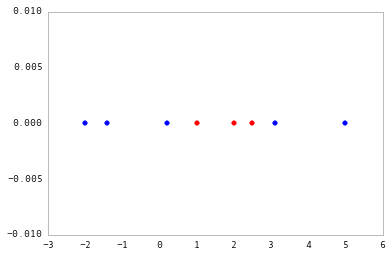

In [14]:
reds = np.array([1, 2, 2.5])
blues = np.array([-2, -1.4, 0.2, 3.1, 5])

plt.scatter(reds, [0]*len(reds), color='r')
plt.scatter(blues, [0]*len(blues), color='b')

Clearly, it is impossible to draw a straight line anywhere that will separate the two classes. However, if we create a feature that is just a quadratic function of the original data, the classes become linearly separable.

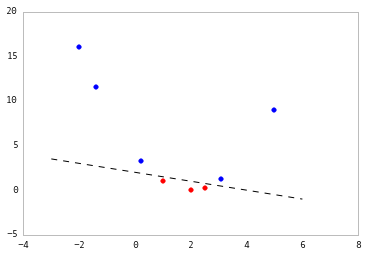

In [15]:
func = lambda x: (x - 2) **2

red_features = [reds, func(reds)]
blue_features = [blues, func(blues)]

plt.scatter(*red_features, color='r')
plt.scatter(*blue_features, color='b')

xvals = np.linspace(-3, 6)
plt.plot(xvals, 2 - 0.5*xvals, 'k--');

More generally, we can create a higher-order polynomial function to use as a decision boundary. For example,

$$y = \left\{ \begin{aligned} 1 &\text{if } \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_1^2 + \ldots \ge 0 \\
0 &\text{ otherwise}\end{aligned}\right.$$

But, this mapping can substantially increase the number of features to consider, and calculating all the polynomial terms can be expensive.

## Kernels

An alternative is to employ a function that measures the similarity between two points in the feature space. Generically, such functions are called **kernels**, and they are characterized by being positive and symmetric, in the sense that for kernel $k$, $k(x,x^{\prime}) = k(x^{\prime}, x)$ (see [Mercer's Theorem](http://www.wikiwand.com/en/Mercer's_theorem)).

You can think of kernels as dot products where we can "cheat" and calculate the value of the dot product between two points without having to explicitly calculate all their feature values. This shortcut is generally referred to as the **kernel trick**

One common kernel is the Gaussian:

$$k(x, x^{\prime}) = \exp\left[-\frac{||x-x^{\prime}||^2}{2 \sigma^2}\right]$$

Notice that when $x$ and $x^{\prime}$ are close to one another, the numerator approaches zero and $k(x,x^{\prime}) \approx 1$, while when they are far apart the numerator becomes large and $k(x,x^{\prime}) \approx 0$. The parameter $\sigma$ controls how quickly an increased distance causes the value of the kernel to fall toward zero.

If we associate a kernel with each point for a particular group that we are using as training examples, our classification function becomes:

$$y = \left\{ \begin{aligned} 1 &\text{if } \theta_0 + \theta_1 k(x,x_1) + \theta_2 k(x,x_2) + \ldots \ge 0\\
0 &\text{ otherwise}\end{aligned}\right.$$

Consider particular values for the parameters, such as $\theta_0=-0.5$ and $\theta_i=1, \, i=1,2,\ldots$. This would result in the function evaluating to approximately 0.5 for a location that is close to any of the points in the set, and to -0.5 for locations that are reasonably far from all the points (as determined by the value of $\sigma$).

For each feature $(x_i, y_i)$ in our dataset, we can calculate the similarity to each feature via the selected kernel:

$$f_i = \left[\begin{align}
k(x_i, &x_0) \\
k(x_i, &x_1) \\
k(x_i, &x_2) \\
\vdots & \\
k(x_i, &x_n)
\end{align}\right]$$

notice that, under the Gaussian kernel at least, there will be one element $k(x_i, x_i)$ that evaluates to 1.

To use the SVM, we use this $f \in \mathbb{R}^{n+1}$ to calculate the inner product $\theta^{\prime} f$ and predict $y_i=1$ if $\theta^{\prime} f_i \ge 0$. We obtain the parameters for $\theta$ by minimizing:

$$\min_{\theta} \left[ C \sum_{i=1}^n y_i k_1(\theta^{\prime} f_i) + (1-y_i) k_0(\theta^{\prime} f_i) \right] + \frac{1}{2}\sum_{j=1}^k \theta^2_j$$


### Regularization and soft margins

There remains a choice to be made for the values of the SVM parameters. Recall $C$, which corresponds to the inverse of the regularization parameter in a lasso model. This choice of $C$ involves a bias-variance tradeoff:

* large C = low bias, high variance
* small C = high bias, low variance

In a support vector machine, regularization results in a **soft margin** that allows some points to cross the optimal decision boundary (resulting in misclassifiction for those points). As C gets larger, the more stable the margin becomes, since it is allowing more points to determine the margin.

We can think of C as a "budget" for permitting points to exceed the margin. We can tune C to determine the optimal hyperplane.

Similarly, if we are using the Gaussian kernel, we must choose a value for $\sigma^2$. When $\sigma^2$ is large, then features are considered similar over greater distances, resulting in a smoother decision boundary, while for smaller $\sigma^2$, similarity falls off quickly with distance.

* large $\sigma^2$ = high bias, low variance
* small $\sigma^2$ = low bias, high variance